Shape of training data:
(50000, 32, 32, 3)
(50000, 10)
Shape of test data:
(10000, 32, 32, 3)
(10000, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_29 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_45 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 13, 13, 32)        9248      
____________________________________

 - 3s - loss: 0.7257 - acc: 0.7457 - val_loss: 0.8404 - val_acc: 0.7117
Epoch 74/200
 - 3s - loss: 0.7211 - acc: 0.7461 - val_loss: 0.8402 - val_acc: 0.7131
Epoch 75/200
 - 3s - loss: 0.7266 - acc: 0.7469 - val_loss: 0.8376 - val_acc: 0.7137
Epoch 76/200
 - 3s - loss: 0.7245 - acc: 0.7486 - val_loss: 0.8286 - val_acc: 0.7193
Epoch 77/200
 - 3s - loss: 0.7207 - acc: 0.7507 - val_loss: 0.8575 - val_acc: 0.7005
Epoch 78/200
 - 3s - loss: 0.7173 - acc: 0.7512 - val_loss: 0.8064 - val_acc: 0.7194
Epoch 79/200
 - 3s - loss: 0.7186 - acc: 0.7495 - val_loss: 0.7656 - val_acc: 0.7370
Epoch 80/200
 - 3s - loss: 0.7123 - acc: 0.7525 - val_loss: 0.8019 - val_acc: 0.7226
Epoch 81/200
 - 3s - loss: 0.7190 - acc: 0.7457 - val_loss: 0.7857 - val_acc: 0.7236
Epoch 82/200
 - 3s - loss: 0.7190 - acc: 0.7507 - val_loss: 0.8079 - val_acc: 0.7266
Epoch 83/200
 - 3s - loss: 0.7133 - acc: 0.7532 - val_loss: 1.0864 - val_acc: 0.6332
Epoch 84/200
 - 3s - loss: 0.7145 - acc: 0.7520 - val_loss: 0.9190 - val_acc: 

Epoch 169/200
 - 3s - loss: 0.6744 - acc: 0.7648 - val_loss: 0.7817 - val_acc: 0.7323
Epoch 170/200
 - 3s - loss: 0.6776 - acc: 0.7627 - val_loss: 0.7731 - val_acc: 0.7321
Epoch 171/200
 - 3s - loss: 0.6761 - acc: 0.7637 - val_loss: 0.7664 - val_acc: 0.7324
Epoch 172/200
 - 3s - loss: 0.6735 - acc: 0.7654 - val_loss: 0.8698 - val_acc: 0.7069
Epoch 173/200
 - 3s - loss: 0.6719 - acc: 0.7650 - val_loss: 0.7858 - val_acc: 0.7278
Epoch 174/200
 - 3s - loss: 0.6762 - acc: 0.7659 - val_loss: 0.7853 - val_acc: 0.7301
Epoch 175/200
 - 3s - loss: 0.6697 - acc: 0.7692 - val_loss: 0.7742 - val_acc: 0.7344
Epoch 176/200
 - 3s - loss: 0.6797 - acc: 0.7631 - val_loss: 0.8270 - val_acc: 0.7188
Epoch 177/200
 - 3s - loss: 0.6707 - acc: 0.7671 - val_loss: 0.7940 - val_acc: 0.7219
Epoch 178/200
 - 3s - loss: 0.6735 - acc: 0.7675 - val_loss: 0.8075 - val_acc: 0.7257
Epoch 179/200
 - 3s - loss: 0.6698 - acc: 0.7675 - val_loss: 0.7625 - val_acc: 0.7409
Epoch 180/200
 - 3s - loss: 0.6687 - acc: 0.7680 - val

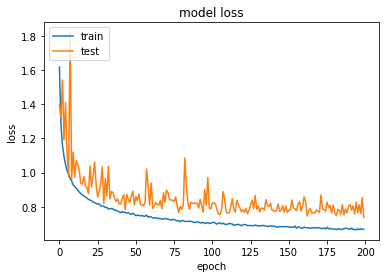

10000/10000 [==============================] - 0s 33us/step

Test accuracy: 74.8%


In [25]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.optimizers import SGD 
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization


#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#transform labesls to one hot vector
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#normalization [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255



print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)




#3 layer CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))

#Batch Normalization Layer
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.15))

model.add(Conv2D(32, (3, 3)))

#Batch Normalization Layer
model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

#Dropout layer
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

#use SGD with nesterov and momentum as optimizer 
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

model.summary()

#training Parameters
batch_size = 128
epochs = 200


history = model.fit(x=X_train,y=y_train,batch_size = batch_size,epochs=epochs, verbose=2,validation_split=0.2)

#plotting of train error and tst error
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
plotLosses(history)
    


# validate the model on test dataset to determine generalization
score = model.evaluate(X_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1])) 